Привет проверяющему)

Надеюсь, в таком формате можно сдавать домашку было...
Я оставила формулировки задач тут, добавила комментарии к решению.

In [12]:
# Pandas понадобился мне для чтения данных)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Я положила данные в папку спроектом в коллабе
expression_data = pd.read_csv("homework_lecture_5_data.csv", index_col=0)
expression_data.tail()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
495,11.731787,23.128685,0.100596,12.412588,0.605454,70.760880,52.887970,0.000000,1.192103,48.614315,...,0.315316,4.770934,0.000000,26.984730,0.000000,42.173374,7.376974,15.958592,51.185820,NK_cell
496,9.942467,33.065037,0.000000,6.337149,4.170284,58.618797,50.762814,0.000000,0.792755,31.209326,...,1.009910,3.487792,0.066474,17.140057,0.000000,36.153587,6.582232,17.137049,64.729836,NK_cell
497,28.450361,41.614952,0.012397,14.773923,6.238087,120.881650,29.391224,0.000000,4.842358,6.349156,...,0.154239,3.276041,0.017711,17.473822,0.282809,97.841460,9.376850,13.085891,211.173430,NK_cell
498,9.897264,35.510582,0.000000,3.920270,2.957491,83.897000,31.947727,0.000000,1.194950,15.183548,...,0.027172,17.101677,0.037348,18.061527,0.037969,24.619675,7.150264,14.122112,38.059753,NK_cell
499,13.769289,26.868212,0.194126,4.888445,2.344540,61.503200,26.633251,0.030604,1.316143,28.463740,...,19.396582,3.783523,0.000000,17.191782,0.000000,19.733097,7.091526,16.446281,31.361362,NK_cell


In [31]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")


In [81]:
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [15]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

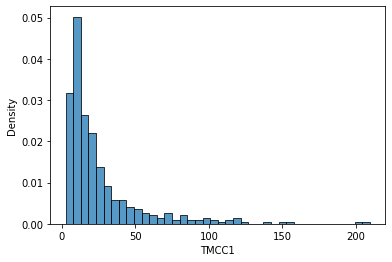

In [38]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

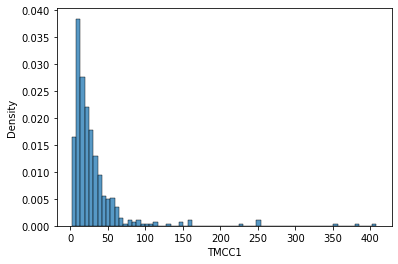

In [37]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [16]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for i in range(n_samples):
        sample = np.random.choice(expressions, size=sample_size)
        mean_expressions.append(np.mean(sample))
    return mean_expressions

25.639751716044

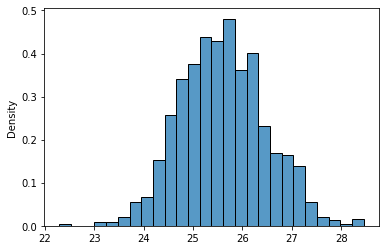

In [57]:
sample_size = 1000
n_samples = 1000
sns.histplot(demonstrate_clt(b_cells_expression_data[example_gene],
                             sample_size, n_samples), stat="density");
b_dem_res = demonstrate_clt(b_cells_expression_data[example_gene],
                             sample_size, n_samples)
b_mean = np.mean(b_dem_res)
b_mean

30.511021726749195

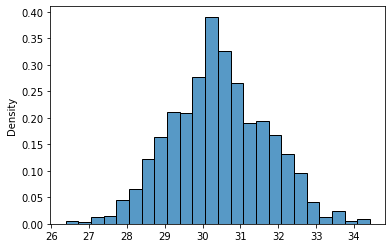

In [60]:
sns.histplot(demonstrate_clt(nk_cells_expression_data[example_gene],
                             sample_size, n_samples), stat="density");
nk_dem_res = demonstrate_clt(nk_cells_expression_data[example_gene],
                             sample_size, n_samples)
nk_mean = np.mean(nk_dem_res)
nk_mean

Построим доверительные интервалы  для двух типов клеток, чтобы сравнить среднюю экспрессию данного гена.

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

Мы не знаем дисперсию заранее, а следовательно будем оценивать её стандартным отклонением.

In [65]:
def find_ci(sample):
    std = sample.std()
    mean_sample = np.mean(sample)
    se = std / np.sqrt(len(sample))
    left = mean_sample - 1.96 * se
    right = mean_sample + 1.96 * se
    return left, right

In [66]:
# B-клетки
b_interval = find_ci(b_cells_expression_data[example_gene])
b_interval

(22.965535395700485, 28.19742590862753)

In [67]:
# NK-клетки
nk_interval = find_ci(nk_cells_expression_data[example_gene])
nk_interval

(26.854734824710704, 34.00790437608929)

Доверительные интервалы перекрываются, следовательно можно сказать, что статистически значимых различий в экспрессии гена в клетках B и NK нет.

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [72]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

(Спасибо за примерчик)))

In [ ]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [ ]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [75]:
def check_intervals_intersect(first_ci, second_ci):
       first = st.t.interval(alpha=0.95,
              df=len(first_ci) - 1, 
              loc=np.mean(first_ci), 
              scale=st.sem(first_ci))
       second = st.t.interval(alpha=0.95,
              df=len(second_ci) - 1, 
              loc=np.mean(second_ci), 
              scale=st.sem(second_ci))
       are_intersect = second[0] < first[1] < second[1] or first[0] < second[1] < first[1]
       return are_intersect 

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [84]:
def check_dge_with_ci(first_table, second_table):
    ci_test_results = []
    for a in first_table.columns[:-1].values:
        ci_test_results.append(check_intervals_intersect(
            first_table[a], second_table[a]))
    return ci_test_results

In [ ]:
check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [87]:
from statsmodels.stats.weightstats import ztest

In [88]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-2.0954341654870228, 0.036132415060383116)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

Таким образом, если разичие значимо, функция вернёт "False". В таких случаях p-value<0.05.

In [91]:
def check_dge_with_ztest(first_table, second_table):
    z_test_results = []
    for a in first_table.columns[:-1].values:
        z_test_results.append(ztest(
            first_table[a], second_table[a])[1] > 0.05)
    return z_test_results

In [ ]:
check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

In [108]:
import pandas as pd
import numpy as np
import scipy.stats as st
from statsmodels.stats.weightstats import ztest

def check_intervals_intersect(first_ci, second_ci):
       first = st.t.interval(alpha=0.95,
              df=len(first_ci) - 1, 
              loc=np.mean(first_ci), 
              scale=st.sem(first_ci))
       second = st.t.interval(alpha=0.95,
              df=len(second_ci) - 1, 
              loc=np.mean(second_ci), 
              scale=st.sem(second_ci))
       are_intersect = second[0] < first[1] < second[1] or first[0] < second[1] < first[1]
       return are_intersect 

def check_dge_with_ci(first_table, second_table):
    ci_test_results = []
    for a in first_table.columns[:-1].values:
        ci_test_results.append(check_intervals_intersect(
            first_table[a], second_table[a]))
    return ci_test_results

def check_dge_with_ztest(first_table, second_table):
    z_test_results = []
    for a in first_table.columns[:-1].values:
        z_test_results.append(ztest(
            first_table[a], second_table[a])[1] > 0.05)
    return z_test_results

def mean_differ(first_table, second_table):
    mean_diff = []
    for a in first_table.columns[:-1].values:
        mean_diff.append(np.mean(first_table[a])-np.mean(second_table[a]))
    return mean_diff


def create_table(first_cell_type_expressions_path, second_cell_type_expressions_path, save_results_table):
    first_table = pd.read_csv(f"{first_cell_type_expressions_path}", index_col=0)
    second_table = pd.read_csv(f"{second_cell_type_expressions_path}", index_col=0)
    ci_test_results = check_dge_with_ci(first_table, second_table)
    z_test_results = check_dge_with_ztest(first_table, second_table)
    mean_diff = mean_differ(first_table, second_table)
    results = {
        "ci_test_results": ci_test_results,
        "z_test_results": z_test_results,
        "mean_diff": mean_diff
    }
    df_results = pd.DataFrame(results)
    df_results.to_csv(f"{save_results_table}.csv")

while True:
    print("Enter the path to the file with the first cell type")
    first = str(input())
    print("Enter the path to the file with the second cell type")
    second = str(input())
    print("Enter the path to the results")
    res = str(input())
    create_table(first, second, res)
    print("Congrats with results! Do you want to continue? y/n")
    command = str(input())
    command = command.lower()
    if command=="yes" or command=="y":
      pass
    else:
      print("bye)")
      break

Enter the path to the file with the first cell type
/content/homework_lecture_5_data.csv
Enter the path to the file with the second cell type
/content/homework_lecture_5_data.csv
Enter the path to the results
/content
Congrats with results! Do you want to continue? y/n
n
bye)


## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

Вот так)

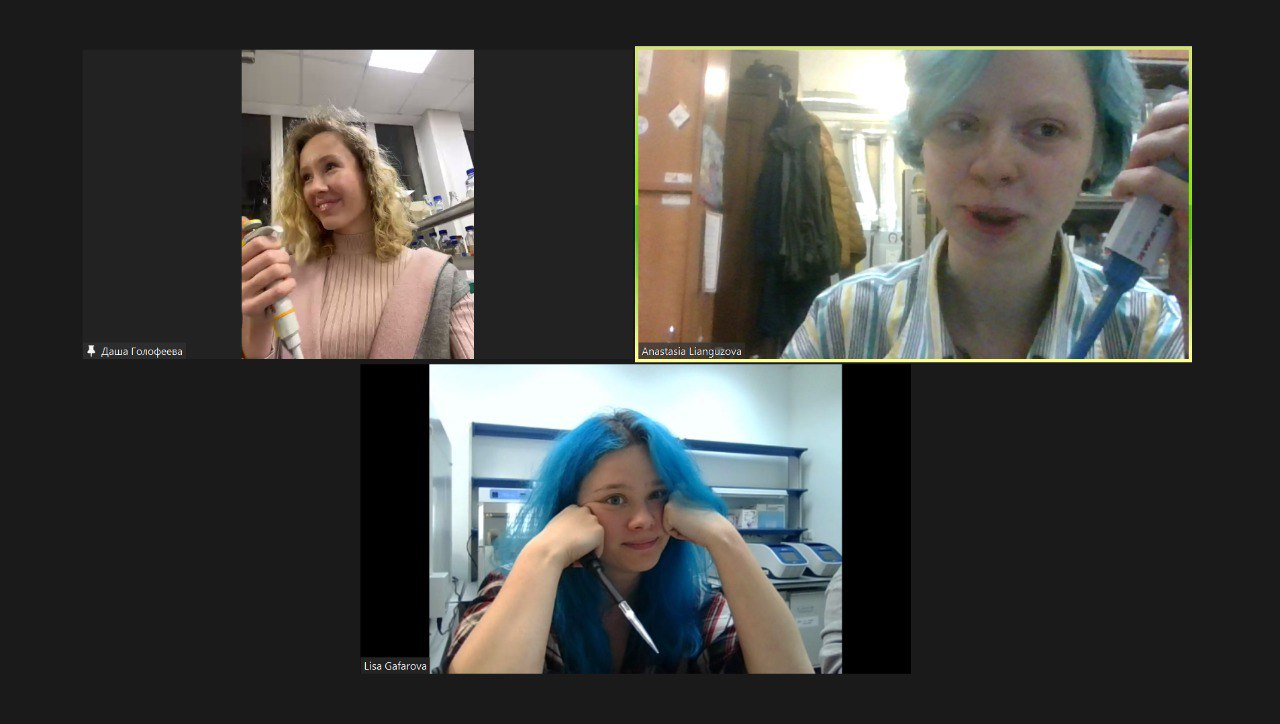